<a href="https://colab.research.google.com/github/mingyu1021/AI-class/blob/main/4week/4week_DL_lecture.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


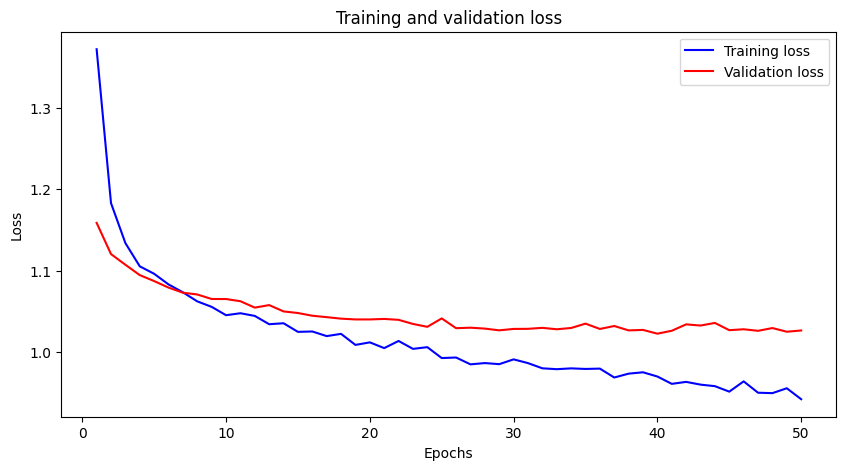

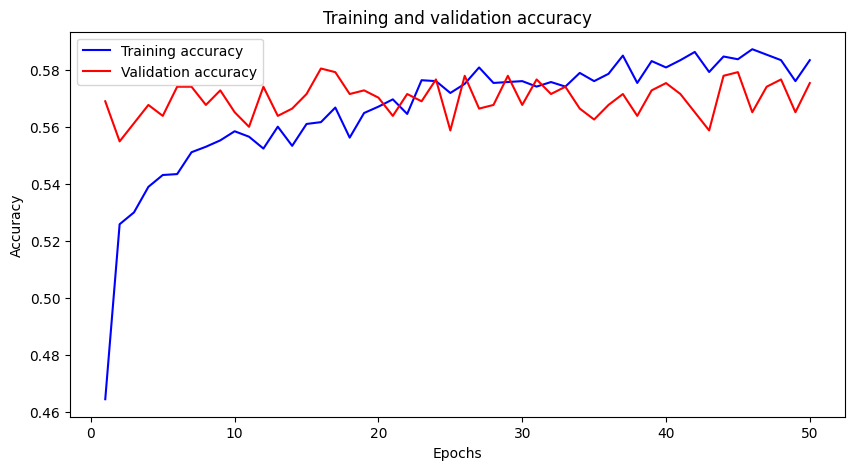

              precision    recall  f1-score   support

           0       0.50      0.20      0.29         5
           1       0.23      0.12      0.16        25
           2       0.61      0.54      0.58       291
           3       0.54      0.74      0.63       432
           4       0.54      0.30      0.39       192
           5       0.10      0.03      0.04        35

    accuracy                           0.55       980
   macro avg       0.42      0.32      0.35       980
weighted avg       0.54      0.55      0.53       980

[[  1   0   1   3   0   0]
 [  0   3  15   7   0   0]
 [  1   9 158 120   3   0]
 [  0   1  78 321  32   0]
 [  0   0   5 120  58   9]
 [  0   0   1  19  14   1]]


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from tensorflow.keras import layers, models
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import train_test_split
import numpy as np

# 1. 데이터 로드
df = pd.read_csv('/content/drive/MyDrive/AI-class/winequality-white.csv', delimiter=';')

# 2. 독립 변수 (X)와 종속 변수 (y) 분리
X = df.drop('quality', axis=1)
y = df['quality']

# 3. 데이터 분할
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 4. 데이터 스케일링
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)

# 테스트 데이터에는 transform만 적용
X_test_scaled = scaler.transform(X_test)

# 5. 종속 변수 원-핫 인코딩
# Keras는 멀티클래스 분류 시 원-핫 인코딩된 라벨을 요구
y_train_one_hot = pd.get_dummies(y_train).values
y_test_one_hot = pd.get_dummies(y_test).values

# 6. 모델 구축
model = models.Sequential([
    layers.Dense(64, activation="relu", input_shape=(X_train_scaled.shape[1],)),
    layers.Dropout(0.3),
    layers.Dense(32, activation="relu"),
    layers.Dense(y_train_one_hot.shape[1], activation="softmax")
])

model.compile(
    optimizer="adam",
    loss="categorical_crossentropy",
    metrics=["accuracy"]
)

# 7. 모델 학습
history = model.fit(
    X_train_scaled, y_train_one_hot,
    validation_split=0.2,
    epochs=50,
    batch_size=16,
    verbose=0
)

# 8. 예측 및 결과 출력
y_pred = model.predict(X_test_scaled)
y_test_class = np.argmax(y_test_one_hot, axis=1)
y_pred_class = np.argmax(y_pred, axis=1)

# 학습 곡선 시각화
loss = history.history['loss']
val_loss = history.history['val_loss']
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
epochs = range(1, len(loss) + 1)

plt.figure(figsize=(10, 5))
plt.plot(epochs, loss, 'b', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

plt.figure(figsize=(10, 5))
plt.plot(epochs, acc, 'b', label='Training accuracy')
plt.plot(epochs, val_acc, 'r', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# 분류 보고서 및 혼동 행렬
print(classification_report(y_test_class, y_pred_class, zero_division=0))
print(confusion_matrix(y_test_class, y_pred_class))

과적합

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


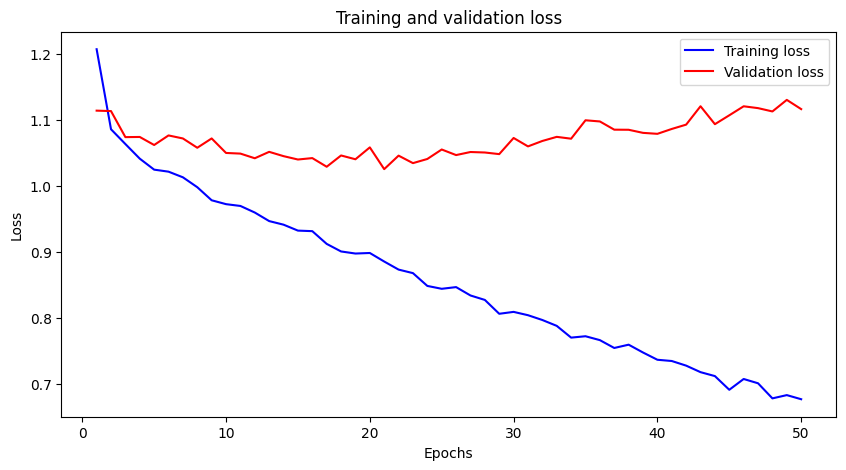

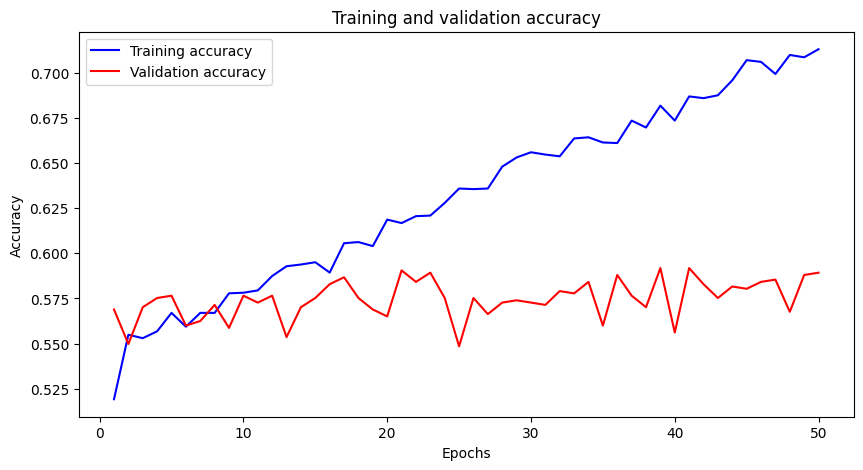

              precision    recall  f1-score   support

           0       0.25      0.20      0.22         5
           1       0.22      0.16      0.19        25
           2       0.64      0.60      0.62       291
           3       0.61      0.67      0.64       432
           4       0.53      0.54      0.54       192
           5       0.45      0.26      0.33        35

    accuracy                           0.59       980
   macro avg       0.45      0.40      0.42       980
weighted avg       0.59      0.59      0.59       980

[[  1   0   2   2   0   0]
 [  1   4  12   5   3   0]
 [  1  11 175  91  12   1]
 [  1   3  76 288  60   4]
 [  0   0   6  76 104   6]
 [  0   0   1   8  17   9]]


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from tensorflow.keras import layers, models
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import train_test_split
import numpy as np

# 1. 데이터 로드
df = pd.read_csv('/content/drive/MyDrive/AI-class/winequality-white.csv', delimiter=';')

# 2. 독립 변수 (X)와 종속 변수 (y) 분리
X = df.drop('quality', axis=1)
y = df['quality']

# 3. 데이터 분할
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 4. 데이터 스케일링
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)

# 테스트 데이터에는 transform만 적용
X_test_scaled = scaler.transform(X_test)

# 5. 종속 변수 원-핫 인코딩
# Keras는 멀티클래스 분류 시 원-핫 인코딩된 라벨을 요구
y_train_one_hot = pd.get_dummies(y_train).values
y_test_one_hot = pd.get_dummies(y_test).values

# 6. 모델 구축
model = models.Sequential([
    layers.Dense(256, activation="relu", input_shape=(X_train_scaled.shape[1],)),
    layers.Dropout(0.3),
    layers.Dense(128, activation="relu"),
    layers.Dense(y_train_one_hot.shape[1], activation="softmax")
])

model.compile(
    optimizer="adam",
    loss="categorical_crossentropy",
    metrics=["accuracy"]
)

# 7. 모델 학습
history = model.fit(
    X_train_scaled, y_train_one_hot,
    validation_split=0.2,
    epochs=50,
    batch_size=16,
    verbose=0
)

# 8. 예측 및 결과 출력
y_pred = model.predict(X_test_scaled)
y_test_class = np.argmax(y_test_one_hot, axis=1)
y_pred_class = np.argmax(y_pred, axis=1)

# 학습 곡선 시각화
loss = history.history['loss']
val_loss = history.history['val_loss']
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
epochs = range(1, len(loss) + 1)

plt.figure(figsize=(10, 5))
plt.plot(epochs, loss, 'b', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

plt.figure(figsize=(10, 5))
plt.plot(epochs, acc, 'b', label='Training accuracy')
plt.plot(epochs, val_acc, 'r', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# 분류 보고서 및 혼동 행렬
print(classification_report(y_test_class, y_pred_class, zero_division=0))
print(confusion_matrix(y_test_class, y_pred_class))